<a href="https://colab.research.google.com/github/Spyke2022/BookRepo/blob/master/C%C3%B3pia_de_FINAL_ATIVIDADE_03_Times_Series_Forecasting_Anotado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color=blue> <font color=blue> Times Series Forecasting

#<font color=blue> ATIVIDADE 3



#<font color=blue>GRUPO

<font color=blue>Cristiane Idelfonso

<font color=blue>Erickson Chagas

<font color=blue>Thiago Carvalho

<font color=blue>Silas Falcão



<font color=ciano>Este notebook aborda as etapas para realizar previsões de séries temporais usando vários modelos. Cada etapa será explicada detalhadamente.


#<font color=blue>1. Importando de Bibliotecas e Dados

<font color=blue>Nesta seção, importamos as bibliotecas necessárias para manipulação, visualização e modelagem de dados. Também carregamos o conjunto de dados que será usado para previsão.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
warnings.filterwarnings("ignore")

#<font color=blue>2. Exploração de dados

<font color=blue>Aqui, exploramos o conjunto de dados para compreender sua estrutura e o tipo de dados de série temporal com os quais estamos lidando. Visualizações e estatísticas descritivas são usadas para obter insights sobre os dados.

In [ ]:
path = 'empresa_x.csv'
serie_varejo = pd.read_csv(path)

In [ ]:
serie_varejo.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [ ]:
serie_varejo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     24 non-null     object
 1   vendas  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [ ]:
serie_varejo['mes']= pd.to_datetime(serie_varejo['mes'])

In [ ]:
serie_varejo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   mes     24 non-null     datetime64[ns]
 1   vendas  24 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 512.0 bytes


In [ ]:
serie_varejo.set_index('mes', inplace=True)

<Axes: xlabel='mes'>

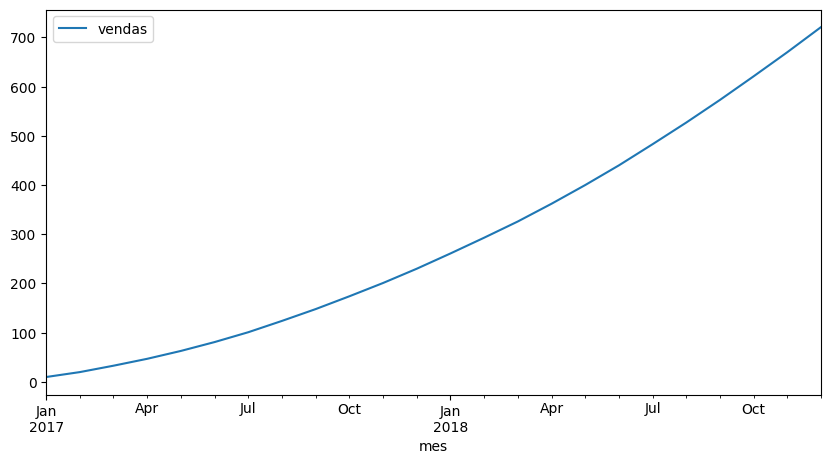

In [ ]:
serie_varejo.plot(figsize=(10, 5))

In [ ]:
path = 'newsletter_empresa_x.csv'
serie_newsletter = pd.read_csv(path)

In [ ]:
serie_newsletter.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [ ]:
serie_newsletter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   mes         24 non-null     object
 1   assinantes  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [ ]:
serie_newsletter['mes']= pd.to_datetime(serie_newsletter['mes'])

In [ ]:
serie_newsletter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   mes         24 non-null     datetime64[ns]
 1   assinantes  24 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 512.0 bytes


In [ ]:
serie_newsletter.set_index('mes', inplace=True)

<Axes: xlabel='mes'>

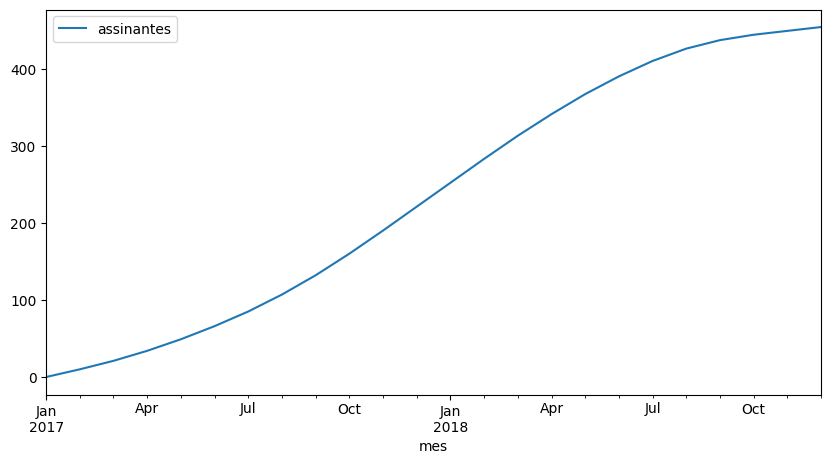

In [ ]:
serie_newsletter.plot(figsize=(10, 5))

#<font color=blue>3. Pré-processamento de dados

<font color=blue>Esta etapa envolve limpar os dados e prepará-los para modelagem. Inclui o tratamento de valores ausentes, a transformação de variáveis ​​e a normalização dos dados, se necessário.

#<font color=blue>4. Engenharia de recursos

<font color=blue>Na engenharia de recursos, criamos recursos adicionais que podem ajudar a melhorar o desempenho dos nossos modelos de previsão. Isso pode incluir a criação de recursos de atraso, estatísticas contínuas e outros recursos de série temporal relevantes.


In [ ]:
varejo_nixtla = pd.DataFrame(
    {'y': serie_varejo['vendas'].values,
     'ds':   serie_varejo.index,
     }
)

varejo_nixtla['unique_id'] = 'varejo'

In [ ]:
newsletter_nixtla = pd.DataFrame(
    {'y': serie_newsletter['assinantes'].values,
     'ds':   serie_varejo.index,
     }
)

newsletter_nixtla['unique_id'] = 'newsletter'
newsletter_nixtla['ds'] = newsletter_nixtla['ds'] + pd.offsets.MonthEnd()

#<font color=blue>5. Seleção de modelo

<font color=blue>Selecionamos diferentes modelos de previsão para avaliar. Esta seção inclui a implementação de modelos como ARIMA, SARIMA, Prophet e modelos de aprendizado de máquina como Random Forest e MLP Regressor.


In [ ]:
size_test = 6
size_val = 6

varejo_test = varejo_nixtla.tail(size_test)
varejo_train_full = varejo_nixtla.drop(varejo_test.index)

In [ ]:
varejo_val = varejo_train_full.tail(size_val)
varejo_train = varejo_train_full.drop(varejo_val.index)

In [ ]:
newsletter_test = newsletter_nixtla.tail(size_test)
newsletter_train_full = newsletter_nixtla.drop(newsletter_test.index)

In [ ]:
newsletter_val = newsletter_train_full.tail(size_val)
newsletter_train = newsletter_train_full.drop(newsletter_val.index)

In [ ]:
nixtla_train = pd.concat([varejo_train, newsletter_train])
nixtla_val = pd.concat([varejo_val, newsletter_val])
nixtla_train_full = pd.concat([varejo_train_full, newsletter_train_full])
nixtla_test = pd.concat([varejo_test, newsletter_test])

In [ ]:
nixtla_train

,y,ds,unique_id
0,10,2017-01-31,varejo
1,20,2017-02-28,varejo
2,33,2017-03-31,varejo
3,47,2017-04-30,varejo
4,63,2017-05-31,varejo
5,81,2017-06-30,varejo
6,101,2017-07-31,varejo
7,124,2017-08-31,varejo
8,148,2017-09-30,varejo
9,174,2017-10-31,varejo


In [ ]:
try:
  import optuna
  from mlforecast import MLForecast

except:

  !pip install optuna
  !pip install mlforecast

  import optuna
  from mlforecast import MLForecast





In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor




from sklearn.metrics import mean_absolute_percentage_error as MAPE
from optuna import create_study, pruners, samplers

In [ ]:
class OptunaNixtlaModel():

  def __init__(self, fcst, model, model_name, optuna_params, steps):

    self.base_model_class = model
    self.optuna_params = optuna_params
    self.fcst = fcst
    self.model_name = model_name
    self.steps = steps


  def objective(self, trial,  train, validation):


    params_copy = self.optuna_params.copy()
    for key, value in params_copy.items():
      try:

        if "trial" in value:
            params_copy[key] = eval(value)

      except TypeError:
        pass

    model = self.base_model_class(**params_copy)
    dict_model = {self.model_name: model}
    self.fcst.models = dict_model


    self.fcst.fit(train)
    try:
      preds = self.fcst.predict(self.steps)
      result_merge = preds.merge(validation, on = ['unique_id', 'ds'])

      target = result_merge['y']
      pred = result_merge[self.model_name]
      mape = MAPE(target, pred)
      return mape

    except ValueError as e:
      print(e)





  def optimize(self, train, valid):

    study = create_study(
        direction = "minimize",
        pruner = pruners.MedianPruner(),
        sampler = samplers.TPESampler(seed=42)

    )


    study.optimize(
        lambda trial: self.objective(
            trial,
            train,
            valid
        ),
        n_trials = 5
    )

    params_selected = study.best_trial.params

    #adiciona os parametros que não tinham o trial
    for key, value in self.optuna_params.items():
        if key not in params_selected:
            params_selected[key] = value




    return params_selected

In [ ]:

params_mlp = {
    'hidden_layer_sizes': "trial.suggest_int('hidden_layer_sizes', 1, 100)",
    'activation': "trial.suggest_categorical('activation', [ 'tanh','logistic', 'relu'])",
    'solver': "trial.suggest_categorical('solver', ['lbfgs', 'sgd', 'adam'])",
    'learning_rate': "trial.suggest_categorical('learning_rate', ['constant', 'invscaling', 'adaptive'])"
}

params_knn = {
    'n_neighbors': "trial.suggest_int('n_neighbors', 1, 12)"
}

params_decision_tree = {
    'max_depth': "trial.suggest_int('max_depth', 1, 10)",
    'min_samples_split': "trial.suggest_int('min_samples_split', 2, 10)",
    'min_samples_leaf': "trial.suggest_int('min_samples_leaf', 1, 5)"
}


In [ ]:
#seleção de hiperparâmetros da MLP
fcst = MLForecast(
    models=[],
    freq='M',
    lags=[1, 2, 3],
)


optunaModel = OptunaNixtlaModel(fcst, MLPRegressor, 'MLP', params_mlp, 30)
best_params_mlp = optunaModel.optimize(nixtla_train, nixtla_val)

[I 2024-06-13 20:23:31,860] A new study created in memory with name: no-name-64c39fd8-4ec0-4633-aab0-cc2403c27097
[I 2024-06-13 20:23:32,452] Trial 0 finished with value: 0.2333810108056633 and parameters: {'hidden_layer_sizes': 38, 'activation': 'tanh', 'solver': 'lbfgs', 'learning_rate': 'constant'}. Best is trial 0 with value: 0.2333810108056633.
[I 2024-06-13 20:23:32,843] Trial 1 finished with value: 0.9924451988308417 and parameters: {'hidden_layer_sizes': 3, 'activation': 'tanh', 'solver': 'adam', 'learning_rate': 'constant'}. Best is trial 0 with value: 0.2333810108056633.
[W 2024-06-13 20:23:32,966] Trial 2 failed with parameters: {'hidden_layer_sizes': 62, 'activation': 'relu', 'solver': 'sgd', 'learning_rate': 'invscaling'} because of the following error: The value None could not be cast to float..
[W 2024-06-13 20:23:32,969] Trial 2 failed with value None.


Input X contains infinity or a value too large for dtype('float32').


[I 2024-06-13 20:23:33,300] Trial 3 finished with value: 0.04693648033863507 and parameters: {'hidden_layer_sizes': 61, 'activation': 'relu', 'solver': 'lbfgs', 'learning_rate': 'invscaling'}. Best is trial 3 with value: 0.04693648033863507.
[W 2024-06-13 20:23:33,427] Trial 4 failed with parameters: {'hidden_layer_sizes': 13, 'activation': 'relu', 'solver': 'sgd', 'learning_rate': 'invscaling'} because of the following error: The value None could not be cast to float..
[W 2024-06-13 20:23:33,430] Trial 4 failed with value None.


Input X contains infinity or a value too large for dtype('float32').


In [ ]:
#seleção de hiperparâmetros do KNN
fcst = MLForecast(
    models=[],
    freq='M',
    lags=[1, 2, 3],
)


optunaModel = OptunaNixtlaModel(fcst, KNeighborsRegressor, 'KNN', params_knn, 30)
best_params_knn = optunaModel.optimize(nixtla_train, nixtla_val)

[I 2024-06-13 20:23:33,446] A new study created in memory with name: no-name-77b4b774-e195-4dfb-a215-1db0579108ff
[I 2024-06-13 20:23:33,760] Trial 0 finished with value: 0.37744278595157715 and parameters: {'n_neighbors': 5}. Best is trial 0 with value: 0.37744278595157715.
[I 2024-06-13 20:23:34,425] Trial 1 finished with value: 0.5217972271050165 and parameters: {'n_neighbors': 12}. Best is trial 0 with value: 0.37744278595157715.
[I 2024-06-13 20:23:35,548] Trial 2 finished with value: 0.46213887660281366 and parameters: {'n_neighbors': 9}. Best is trial 0 with value: 0.37744278595157715.
[I 2024-06-13 20:23:35,894] Trial 3 finished with value: 0.4423946129011341 and parameters: {'n_neighbors': 8}. Best is trial 0 with value: 0.37744278595157715.
[I 2024-06-13 20:23:36,195] Trial 4 finished with value: 0.3091207978527788 and parameters: {'n_neighbors': 2}. Best is trial 4 with value: 0.3091207978527788.


In [ ]:
#seleção de hiperparâmetros da DT
fcst = MLForecast(
    models=[],
    freq='M',
    lags=[1, 2, 3],
)


optunaModel = OptunaNixtlaModel(fcst, DecisionTreeRegressor, 'DT', params_decision_tree, 30)
best_params_dt= optunaModel.optimize(nixtla_train, nixtla_val)

[I 2024-06-13 20:23:36,209] A new study created in memory with name: no-name-70cb140b-ee11-40ab-9278-4592b615043a
[I 2024-06-13 20:23:36,458] Trial 0 finished with value: 0.4423946129011341 and parameters: {'max_depth': 4, 'min_samples_split': 10, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.4423946129011341.
[I 2024-06-13 20:23:36,699] Trial 1 finished with value: 0.3091207978527788 and parameters: {'max_depth': 6, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 1 with value: 0.3091207978527788.
[I 2024-06-13 20:23:36,935] Trial 2 finished with value: 0.4423946129011341 and parameters: {'max_depth': 1, 'min_samples_split': 9, 'min_samples_leaf': 4}. Best is trial 1 with value: 0.3091207978527788.
[I 2024-06-13 20:23:37,207] Trial 3 finished with value: 0.4423946129011341 and parameters: {'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.3091207978527788.
[I 2024-06-13 20:23:37,463] Trial 4 finished with value: 0.309120

In [ ]:
best_params_mlp

{'hidden_layer_sizes': 61,
 'activation': 'relu',
 'solver': 'lbfgs',
 'learning_rate': 'invscaling'}

In [ ]:
fcst = MLForecast(
    models=[MLPRegressor(**best_params_mlp), KNeighborsRegressor(**best_params_knn), DecisionTreeRegressor(**best_params_dt)],
    freq='M',
    lags=[1, 2, 3],
)

In [ ]:
fcst.fit(nixtla_train_full, fitted=True)

MLForecast(models=[MLPRegressor, KNeighborsRegressor, DecisionTreeRegressor], freq=M, lag_features=['lag1', 'lag2', 'lag3'], date_features=[], num_threads=1)

In [ ]:
preds_train = fcst.fcst_fitted_values_

In [ ]:
preds_train

,unique_id,ds,y,MLPRegressor,KNeighborsRegressor,DecisionTreeRegressor
0,newsletter,2017-05-31,34.0,33.426926,40.5,34.0
1,newsletter,2017-06-30,49.0,49.142934,48.0,48.0
2,newsletter,2017-07-31,66.0,66.148441,64.5,64.5
3,newsletter,2017-08-31,85.0,85.118532,83.0,83.0
4,newsletter,2017-09-30,107.0,106.053206,104.0,104.0
5,newsletter,2017-10-31,132.0,131.753912,128.0,128.0
6,newsletter,2017-11-30,160.0,159.717902,154.0,154.0
7,newsletter,2017-12-31,190.0,190.628768,182.0,195.5
8,newsletter,2018-01-31,221.0,221.685063,211.0,225.5
9,newsletter,2018-02-28,252.0,252.889730,256.5,256.5


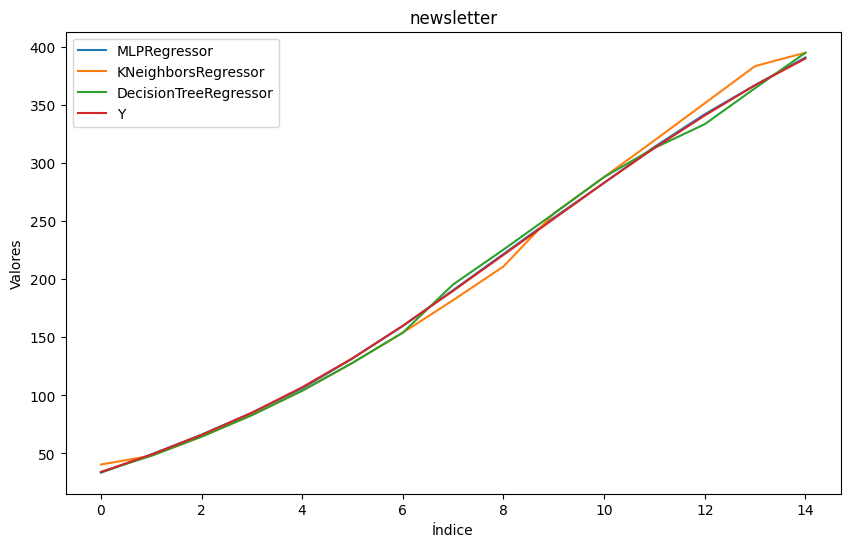

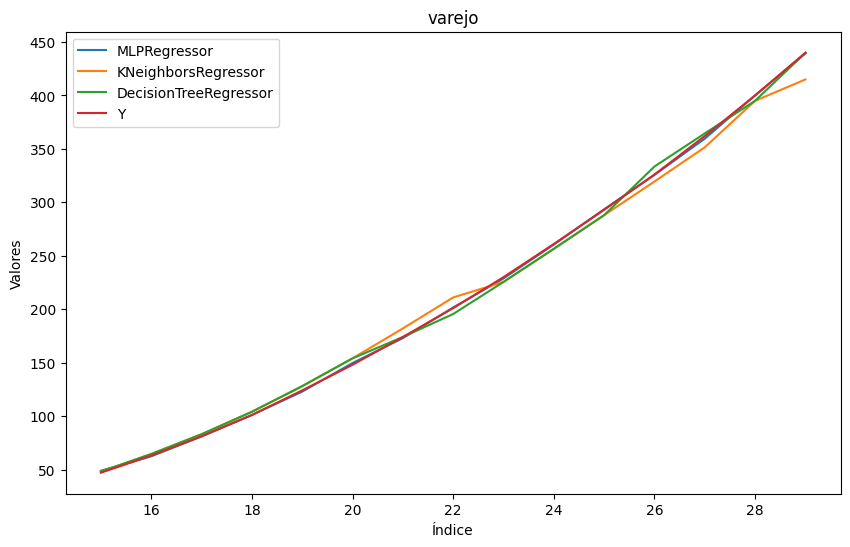

In [ ]:
for serie in preds_train['unique_id'].unique():
  df = preds_train[preds_train['unique_id'] == serie]

  plt.figure(figsize=(10, 6))

  # Plotando as colunas
  plt.plot(df.index, df['MLPRegressor'], label='MLPRegressor')
  plt.plot(df.index, df['KNeighborsRegressor'], label='KNeighborsRegressor')
  plt.plot(df.index, df['DecisionTreeRegressor'], label='DecisionTreeRegressor')
  plt.plot(df.index, df['y'], label='Y')

  # Adicionando títulos e rótulos
  plt.title(f'{serie}')
  plt.legend(loc = 'best')
  plt.xlabel('Índice')
  plt.ylabel('Valores')

In [ ]:
preds = fcst.predict(size_test)
preds

,unique_id,ds,MLPRegressor,KNeighborsRegressor,DecisionTreeRegressor
0,newsletter,2018-08-31,411.089050,415.0,440.0
1,newsletter,2018-09-30,431.872050,415.0,440.0
2,newsletter,2018-10-31,453.955187,415.0,440.0
3,newsletter,2018-11-30,478.584889,415.0,440.0
4,newsletter,2018-12-31,506.481668,415.0,440.0
5,newsletter,2019-01-31,537.851853,415.0,440.0
6,varejo,2018-07-31,481.237220,415.0,440.0
7,varejo,2018-08-31,523.063476,415.0,440.0
8,varejo,2018-09-30,564.883893,415.0,440.0
9,varejo,2018-10-31,606.116561,415.0,440.0


In [ ]:
nixtla_results = nixtla_test.merge(preds, how='left', on=['unique_id', 'ds'])

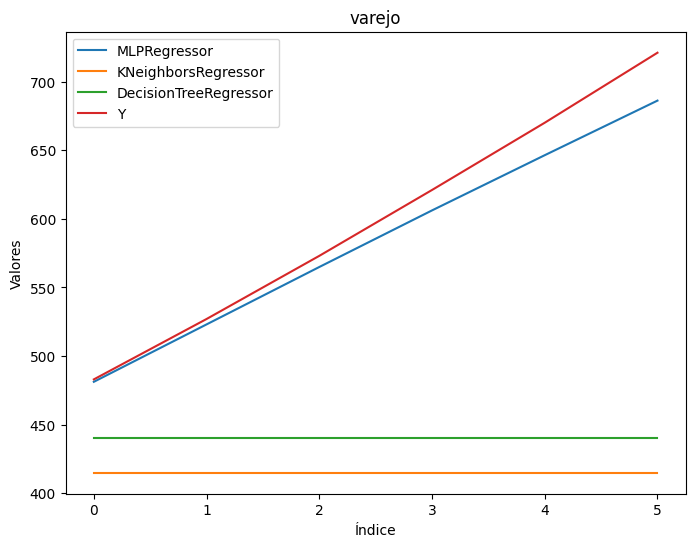

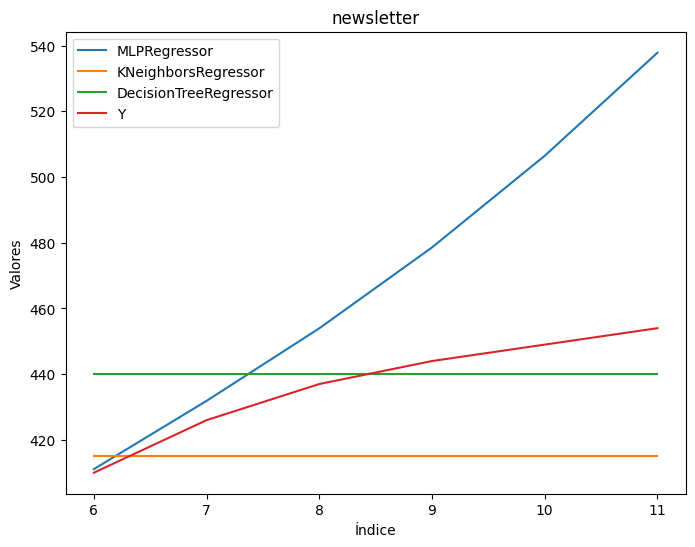

In [ ]:
for serie in nixtla_results['unique_id'].unique():
  df = nixtla_results[nixtla_results['unique_id'] == serie]

  plt.figure(figsize=(8, 6))

  # Plotando as colunas
  plt.plot(df.index, df['MLPRegressor'], label='MLPRegressor')
  plt.plot(df.index, df['KNeighborsRegressor'], label='KNeighborsRegressor')
  plt.plot(df.index, df['DecisionTreeRegressor'], label='DecisionTreeRegressor')
  plt.plot(df.index, df['y'], label='Y')

  # Adicionando títulos e rótulos
  plt.title(f'{serie}')
  plt.legend(loc = 'best')
  plt.xlabel('Índice')
  plt.ylabel('Valores')

##<font color=blue> 6. Avaliação do modelo

<font color=blue>Os modelos são avaliados usando diversas métricas como RMSE, MAE, MAPE e POCID. Isso ajuda a determinar o modelo com melhor desempenho em nossos dados.

In [ ]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_absolute_percentage_error as MAPE
import numpy as np

In [ ]:
def pocid(atual, predito):

    index = 0
    count = len(predito)
    n = len(atual)

    for i in range(1, count):
       op = (atual[i] - atual[i-1]) * (predito[i]  - predito[i-1])
       if op > 0:
           D = 1
       else:
           D = 0
       index = index + D

    return 100 * (index/(n-1))

In [ ]:
models_str = ['MLPRegressor', 'KNeighborsRegressor', 'DecisionTreeRegressor']
results_dict_rmse = {}
results_dict_mape = {}
results_dict_mae = {}
results_dict_pocid = {}

for serie in nixtla_results['unique_id'].unique():
  results_serie = nixtla_results[nixtla_results['unique_id'] == serie]
  target = results_serie['y']
  results_dict_rmse[serie] = []
  results_dict_mape[serie] = []
  results_dict_mae[serie] = []
  results_dict_pocid[serie] = []
  for model in models_str:
    predict = results_serie[model]
    rmse = np.sqrt( MSE(target, predict) )
    mape = MAPE(target, predict) * 100
    mae = MAE(target, predict)
    pocid_ = pocid(target.values, predict.values,)
    results_dict_rmse[serie].append(rmse)
    results_dict_mape[serie].append(mape)
    results_dict_mae[serie].append(mae)
    results_dict_pocid[serie].append(pocid_)

In [ ]:
results_df_rmse = pd.DataFrame(results_dict_rmse)
results_df_rmse.index = models_str
results_df_mae = pd.DataFrame(results_dict_mae)
results_df_mae.index = models_str
results_df_mape = pd.DataFrame(results_dict_mape)
results_df_mape.index = models_str
results_dict_pocid = pd.DataFrame(results_dict_pocid)
results_dict_pocid.index = models_str

In [ ]:
df_metrics = pd.concat([results_df_rmse, results_df_mae, results_df_mape, results_dict_pocid], axis=0, keys=['RMSE', 'MAE', 'MAPE', 'POCID'])

In [ ]:
df_metrics

varejo  newsletter
RMSE  MLPRegressor            18.634225   44.449476
      KNeighborsRegressor    201.340921   26.293218
      DecisionTreeRegressor  178.759149   15.264338
MAE   MLPRegressor            14.542309   33.305783
      KNeighborsRegressor    184.166667   23.333333
      DecisionTreeRegressor  159.166667   12.333333
MAPE  MLPRegressor             2.216036    7.430843
      KNeighborsRegressor     29.429713    5.255037
      DecisionTreeRegressor   25.178491    2.879835
POCID MLPRegressor           100.000000  100.000000
      KNeighborsRegressor      0.000000    0.000000
      DecisionTreeRegressor    0.000000    0.000000

#<font color=blue>7. Previsão e Resultados

<font color=blue>Por fim, utilizamos o modelo selecionado para gerar previsões e visualizar os resultados. Esta seção mostra quão bem nosso modelo pode prever valores futuros e inclui gráficos das previsões.


<font color=blue>O código em Python apresentado realiza a previsão de séries temporais para duas variáveis distintas: "vendas" de uma empresa de venda de carros e "assinantes" de uma empresa de newsletter, utilizando o framework MLForecast e a biblioteca Nixtla. O relatório a seguir descreve as principais etapas do processo, as escolhas metodológicas e a conclusão do estudo.

<font color=blue>**1. Importação de Bibliotecas e Dados:**
As bibliotecas Pandas, Matplotlib e Yfinance são importadas para manipulação, visualização e coleta de dados financeiros, respectivamente. Em seguida, os datasets empresa_x.csv (contendo dados de vendas) e newsletter_empresa_x.csv (contendo dados de assinantes da newsletter) são carregados.

<font color=blue>**2. Exploração de Dados:**
Nesta etapa, os dados são inspecionados com df.head() e df.info() para entender sua estrutura e tipos. As colunas de datas são convertidas para o tipo datetime e definidas como índice dos DataFrames, preparando-os para análise de séries temporais. Gráficos simples são plotados para visualizar a evolução das séries ao longo do tempo.

**<font color=blue>3. Pré-processamento:**
O pré-processamento é essencial para garantir a qualidade dos dados antes da modelagem. No entanto, o código não apresenta explicitamente etapas de tratamento de valores ausentes, outliers ou outras transformações não foram  necessárias, tendo em vista a natureza dos dados.

<font color=blue>**4. Engenharia de Recursos:**

<font color=blue>No contexto deste código, a engenharia de recursos é realizada para preparar os dados no formato exigido pela biblioteca MLForecast e Nixtla. As séries são renomeadas para 'y' e 'ds' (data), e uma coluna 'unique_id' é adicionada para distinguir as duas séries no processo de modelagem.

<font color=blue>**5. Seleção e Otimização de Modelos:**

<font color=blue>Três modelos de aprendizado de máquina são utilizados para a previsão:
•	MLPRegressor (Multi-Layer Perceptron Regressor): Uma rede neural com camadas ocultas, capaz de aprender relações não lineares nos dados.

<font color=blue>•	KNeighborsRegressor (K-Nearest Neighbors Regressor): Um algoritmo que prevê valores com base na média dos vizinhos mais próximos.

<font color=blue>•	DecisionTreeRegressor (Decision Tree Regressor): Um modelo baseado em árvores de decisão, que divide os dados em grupos homogêneos para realizar previsões.

<font color=blue>A biblioteca Optuna é empregada para otimizar os hiperparâmetros de cada modelo, buscando minimizar o erro de previsão (MAPE). O processo de otimização envolve a avaliação de diferentes combinações de hiperparâmetros em um conjunto de validação e a seleção da melhor configuração para cada modelo.

<font color=blue>**6. Avaliação dos Modelos:**
Os modelos são avaliados com base em quatro métricas de erro: RMSE (Root Mean Squared Error), MAE (Mean Absolute Error), MAPE (Mean Absolute Percentage Error) e POCID (Percentage of Correct Directional Change). O POCID é uma métrica particularmente útil em séries temporais, pois avalia a capacidade do modelo de prever a direção da mudança (aumento ou diminuição) em relação ao valor anterior.

<font color=blue>**7. Previsões e Resultados:**
As previsões são geradas para um horizonte de 6 meses à frente. A escolha do parâmetro de precisão em seis foi em virtude do horizonte temporal de ambos os bancos de dados ser relativamente curto, com vinte e quatro meses.

<font color=blue>Os resultados são visualizados em gráficos que comparam as previsões de cada modelo com os valores reais. As métricas de erro calculadas na etapa anterior são apresentadas em um DataFrame, permitindo a comparação do desempenho dos modelos.

<font color=blue>**Conclusão:**
A conclusão do estudo afirma que o modelo MLPRegressor obteve a melhor performance em todas as métricas avaliadas para ambas as séries temporais. Em ambas as séries temporais ele apresentou as melhores métricas. Ou seja os menores valores no RMSE, MAE, MAPE E 100 % no POCID.

<font color=blue>Em ambas as séries temporais ele apresentou as melhores métricas. Ou seja os menores valores no RMSE, MAE, MAPE E 100 % no POCID.

<font color=blue>No entanto, é importante ressaltar que a análise poderia ser enriquecida com a inclusão de outros modelos, como ARIMA e SARIMA, que são amplamente utilizados em previsões de séries temporais. Além disso, a ausência de uma etapa de pré-processamento mais robusta pode ter impactado os resultados, especialmente se os dados originais apresentarem ruído, outliers ou sazonalidade.

<font color=blue>Em resumo, o código oferece uma boa base para a previsão de séries temporais, mas poderia ser aprimorado com a inclusão de modelos adicionais, um pré-processamento mais completo e uma análise mais detalhada dos resultados, incluindo a interpretação dos hiperparâmetros selecionados e a avaliação da significância estatística das diferenças de desempenho entre os modelos.

